In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Add, BatchNormalization, MaxPool2D, GlobalAvgPool2D
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set the TensorFlow logging level to WARNING
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

In [3]:
# generate dataframe contains all file directories and their labels
path = '/Users/mac/Downloads/archive/animals/animals'
folder_list = os.listdir(path)
folder_list.remove('.DS_Store')
#labels = os.listdir('/content/animals/animals')
data = {
    'images': [],
    'labels': [] }
for folders in folder_list:
  folder_path = os.path.join(path, folders)
  for pics in os.listdir(folder_path):
    pic_path = os.path.join(folder_path, pics)
    data['images'].append(pic_path)
    data['labels'].append(folders)

raw_trianing_data  =pd.DataFrame(data)
#print(folder_list)

In [9]:
# encode the labels to number
# resize images to fit Res_18, convert image path to tensor
# split the dataset to trianing, validation, and testing

from tensorflow.keras.preprocessing.image import img_to_array, load_img, ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
raw_trianing_data['encoded_labels'] = lb.fit_transform(raw_trianing_data['labels'])

def load_and_preprocess_image(file_path):
    img = load_img(file_path, target_size=(224, 224))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to between 0 and 1
    return img_array
raw_trianing_data['pic_array'] = raw_trianing_data['images'].apply(load_and_preprocess_image)


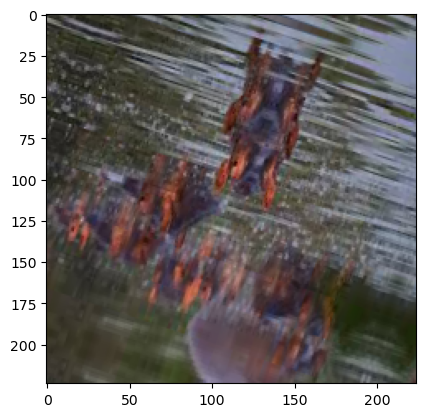

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
datagen =  ImageDataGenerator(
    rotation_range=20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range  =15,
    horizontal_flip  =True,
    vertical_flip = True)
data_aug = tf.keras.Sequential([

layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)])
#image = tf.cast(tf.expand_dims(pic_train[0], 0), tf.float32)
#trial = datagen.fit(image  )
#fig1 = plt.imshow(pic_train[0])
#plt.subplots(121)
plt.imshow(pic_train[1])
plt.imshow(data_aug(pic_train[1]))
#plt.subplots(122)
#plt.imshow(trial)


#plt.imshow(pic_train[0])

#datagen.flow(pic_train[0])
    

In [135]:
# generate the dataframe used for ImageDataGenerator.flow_from_df method
# df should indclude string label + absolute path to the image
# 'images' column contains the absolute path, with the 'label' column contains the string label

flow_df = raw_trianing_data[['images','labels']]

flowdf_train,flowdf_val = train_test_split(flow_df,
                 test_size = 0.2,
                 train_size = 0.75, random_state = 0)

data_train_flow_df  = datagen.flow_from_dataframe(flowdf_train, directory = None, x_col='images', y_col='labels',
                                                  target_size=(224, 224), batch_size = 15, class_mode="categorical", seed = 42)

data_val_flow_df  = datagen.flow_from_dataframe(flowdf_val, directory = None, x_col='images', y_col='labels',
                                                target_size=(224, 224), batch_size = 15, class_mode="categorical" , seed = 42)


'''notes to myself: 
flow_from_df retuerns an interator obj that can be direclty used for training 
it contains sub_categoricla methods to directly view the labels, e.g.data_train_flow_df.class_indices
unlike flow, flow_from_df requires the bacth size need to be carefully tuned in this case to prevent dimension mismatch, 
batch size need to be a factor / multiple of factor of the training lables
'''


Found 4050 validated image filenames belonging to 90 classes.
Found 1080 validated image filenames belonging to 90 classes.


'notes to myself: \nflow_from_df retuerns an interator obj that can be direclty used for training \nit contains sub_categoricla methods to directly view the labels, e.g.data_train_flow_df.class_indices\nunlike flow, flow_from_df requires the bacth size need to be carefully tuned in this case to prevent dimension mismatch, \nbatch size need to be a factor / multiple of factor of the training lables\n'

In [140]:
# using imagedatagenerator.flow method to explicitly work on the array representation 
# manuallyt encode the labels using LabelEncoder

flow = raw_trianing_data[['pic_array','encoded_labels']]
flow_train,flow_val = train_test_split(flow,
                 test_size = 0.2,
                 train_size = 0.75, random_state = 0)
for i in 
print(np.shape(flow_train['pic_array'].to_numpy())
     )
'''
pic_train, pic_test, lab_train, lab_test = train_test_split(raw_trianing_data['pic_array'],
                 raw_trianing_data['labels'],
                 test_size = 0.2,
                 train_size = 0.75, random_state = 0)
#pic_train = tf.cast(pic_train, dtype = tf.float32)
#lab_train =tf.cast(lab_train, dtype=tf.float32 )
#lab_test = tf.cast(lab_test, dtype=tf.float32 )

pic_train = pic_train.to_numpy()
pic_train = np.array([np.array(i) for i in pic_train])
pic_train_cast = tf.cast(pic_train, dtype = tf.float32)

pic_test = pic_test.to_numpy()
pic_test = np.array([np.array(i) for i in pic_test])
pic_test_cast = tf.cast(pic_test, dtype = tf.float32)'''

(4050,)


"\npic_train, pic_test, lab_train, lab_test = train_test_split(raw_trianing_data['pic_array'],\n                 raw_trianing_data['labels'],\n                 test_size = 0.2,\n                 train_size = 0.75, random_state = 0)\n#pic_train = tf.cast(pic_train, dtype = tf.float32)\n#lab_train =tf.cast(lab_train, dtype=tf.float32 )\n#lab_test = tf.cast(lab_test, dtype=tf.float32 )\n\npic_train = pic_train.to_numpy()\npic_train = np.array([np.array(i) for i in pic_train])\npic_train_cast = tf.cast(pic_train, dtype = tf.float32)\n\npic_test = pic_test.to_numpy()\npic_test = np.array([np.array(i) for i in pic_test])\npic_test_cast = tf.cast(pic_test, dtype = tf.float32)"

In [13]:
print(lab_train[1])


tf.Tensor(44.0, shape=(), dtype=float32)


In [24]:
#model= ResNet_18(lr=0.01)
base_model = tf.keras.applications.EfficientNetB3(
    include_top=False,
    weights='imagenet',
    input_shape=(224,224, 3),
    pooling ='max'
)

augmentation_layer = tf.keras.Sequential([tf.keras.layers.RandomFlip(), 
                                          tf.keras.layers.RandomRotation(factor = 0.2),
                                          tf.keras.layers.RandomBrightness(factor= 0.1),
                                           tf.keras.layers.RandomContrast(factor= 0.1)
                                         ])
model = tf.keras.Sequential([augmentation_layer,
                             base_model,
                            tf.keras.layers.Dense(512, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dropout(0.4),
                             tf.keras.layers.Dense(256, activation = 'relu'),
                             tf.keras.layers.BatchNormalization(),
                            tf.keras.layers.Dropout(0.35),
                            tf.keras.layers.Dense(90),
                            tf.keras.layers.Activation('softmax',dtype=tf.float32, name='activationLayer')]
                           )


ln_flow = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
ln_flowdf = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
opt = tf.keras.optimizers.legacy.Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss=ln,  metrics=["accuracy"])


In [32]:
model.compile(optimizer=opt, loss=ln_flowdf,  metrics=["accuracy"])
history  = model.fit(data_train_flow_df, epochs =32, steps_per_epoch=90, validation_data=data_val_flow_df)

Epoch 1/32
90/90 [==============================] - 81s 688ms/step - loss: 3.8994 - accuracy: 0.1400 - val_loss: 2.9833 - val_accuracy: 0.2889
Epoch 2/32
90/90 [==============================] - 45s 497ms/step - loss: 3.3015 - accuracy: 0.2370 - val_loss: 2.5517 - val_accuracy: 0.4000
Epoch 3/32
90/90 [==============================] - 45s 497ms/step - loss: 2.8371 - accuracy: 0.3170 - val_loss: 2.4543 - val_accuracy: 0.3963
Epoch 4/32
90/90 [==============================] - 45s 499ms/step - loss: 2.5679 - accuracy: 0.3585 - val_loss: 2.0530 - val_accuracy: 0.4722
Epoch 5/32
90/90 [==============================] - 45s 498ms/step - loss: 2.2458 - accuracy: 0.4422 - val_loss: 1.7699 - val_accuracy: 0.5639
Epoch 6/32
90/90 [==============================] - 45s 501ms/step - loss: 2.0698 - accuracy: 0.4911 - val_loss: 1.5990 - val_accuracy: 0.5639
Epoch 7/32
90/90 [==============================] - 45s 497ms/step - loss: 1.9748 - accuracy: 0.5067 - val_loss: 1.6885 - val_accuracy: 0.5778

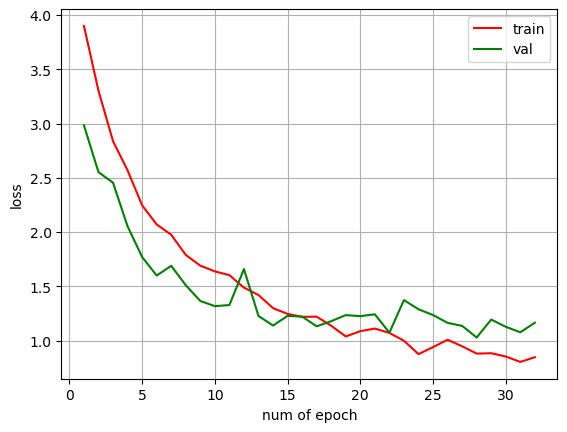

In [35]:
train_loss = history.history['loss']
val_loss  = history.history['val_loss']

fig = plt.figure()
plt.plot(range(1, 33), train_loss, color  ='r', linestyle = '-', label = 'train')
plt.plot(range(1, 33), val_loss, color  ='g',label = 'val')
plt.xlabel("num of epoch")
plt.ylabel("loss")
plt.legend()
plt.grid()
plt.show()


In [26]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, None, None, None   0         
                             )                                   
                                                                 
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 512)               786944    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                      

In [36]:
model.save('model.keras')

In [141]:
model = tf.keras.models.load_model('model.keras')


In [162]:
#data_norm_layer = tf.keras.Sequential([tf.keras.layers.Resizing(224,224),
#tf.keras.layers.Rescale(scale=1./255)])
labels_indice = dict(zip(data_train_flow_df.class_indices.values(), data_train_flow_df.class_indices.keys()))

import re
pattern = r"Desktop/(.*?).jpeg"
def predict_man(path ):
    pic = img_to_array(load_img(path, target_size=(224, 224)))
    pic_batch = np.expand_dims(pic, axis=0)
    result = model.predict(pic_batch)
    print(f'{re.findall(pattern, str(path))[0]} is predicted as: {labels_indice[np.argmax(result)] } with {np.round(np.max(result)*100)} % confidence')
    return load_img(path, target_size=(224, 224))